# Materialien zu <i>zufall</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Aufgaben 10 - Zum Geburtstagsproblem

<i>Siehe dazu
<br>
Elemente der Mathematik<br>
Leistungskurs Stochastik<br>
Schroedel Verlag 2003<br>
S. 52-53
<br><br>
</i>

Es soll die Handhabung von Python-Mitteln zur Bearbeitung der bei Schroedel<br>
betrachteten Aufgaben demonstriert werden
<br>
#### Klassisches Geburtstagsproblem
Das klassische Geburtstagsproblem lautet:

23 Personen werden zufällig ausgewählt. Lohnt es sich darauf zu wetten, dass <br>
unter diesen mindestens zwei sind, die am gleichen Tag Geburtstag haben?
<br><br>
Die Antwort ist
<br><br>
$\qquad$ Ja. $\quad$    Die Wahrscheinlichkeit für dieses Ereignis ist größer als 0.5
<br><br>
Die Berechnung der Wahrscheinlichkeit erfolgt über das Gegenereignis <br>
"keine zwei Personen haben am gleichen Tag Geburtstag"<br><br>
$P(\text{ mindestens zwei der 23 Personen haben am gleichen Tag Geburtstag} ) = $
<br><br>
$\quad = 1 - \frac{365 \, \times \, \dots \, \, \times \, 343}{365^{23}} = 0.5073$

In [1]:
%run zufall/start

Bei der Berechnung kann die Funktion

In [2]:
def p(k):
    m = 1
    for i in range(365-k+1, 365):
        m *= i/365
    return 1 - m

benutzt werden, die bei  $k = 23$  den obigen Wert ergibt

In [3]:
p(23)

0.5072972343239853

Das Ergebnis widerspricht der Intuition vieler. Eventuell besteht die Vorstellung, <br>
dass die Wahrscheinlichkeit linear mit der Anzahl der Personen wächst und einen<br>
Wert über $0.5$ erst bei einem größeren Wert von $k$ erreicht. Die folgende Grafik<br>
zeigt die Abhängigkeit der Wahrscheinlichkeit für das Zusammentreffen von minde-<br>
stens zwei Geburtstagen von der Personenzahl. Es ist ersichtlich, dass eine solche <br>
Annahme nicht richtig ist
<br><br>
(nach G. von Randow, Das Ziegenproblem, Rowohlt 1992/2004, S. 44)
<br><br>
Die Anweisungen zur Erzeugung der Grafik mit <b><i>matplotlib</i></b> sind bewußt im Notebook <br>
belassen worden

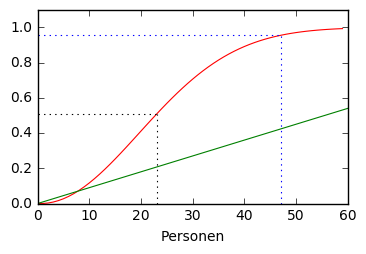

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')
plt.figure(figsize=(4, 2.5))

x = np.array(range(60))
y = np.array([p(int(k)) for k in x])
plt.plot(x, y, color='r', lw=0.8)

z = np.linspace(0, 60, 100)
plt.plot(z, 0.009*z, color='g', lw=0.8)

plt.plot([23, 23], [0, p(23)], color='k', lw=0.8, linestyle='dotted')
plt.plot([0, 23], [p(23), p(23)], color='k', lw=0.8, linestyle='dotted')

plt.plot([47, 47], [0, p(47)], color='b', lw=0.8, linestyle='dotted')
plt.plot([0, 47], [p(47), p(47)], color='b', lw=0.8, linestyle='dotted')

plt.xlabel('Personen')
plt.ylim(0, 1.1)

plt.show()

Die grüne Linie entspricht der Annahme eines linearen Ansteigens der Wahr-<br>
scheinlichkeit. Es sind außerdem die Personenzahlen markiert, bei denen die<br>
Wahrscheinlichkeit $0.5$ (schwarz) bzw.$ 0.95$ (blau) erstmals übersteigt

In [5]:
p(22), p(23), p(46), p(47)

(0.47569530766254997, 0.5072972343239853, 0.9482528433672548, 0.95477440283329
94)

#### Allgemeines Problem der Wiederholungen bei Zufallsversuchen
Ein Zufallsexperiment mit $m$ möglichen gleichwahrscheinlichen Ergebnissen wird<br>
$k$-mal durchgeführt $(k = 1, 2, \dots,  m+1)$
<br>
Es soll der Wert  $k_{50}$  bestimmt werden, dass die Wahrscheinlichkeit für mindestens
<br>
eine Wiederholung größer ist als $50\%$
<br><br>
Die folgende Tabelle (s. Schroedel, Aufgabe 5) zeigt diese Werte für verschiedene $m$<br>
(der letzte Wert entspricht dem Lottospiel 6 aus 49)

<div style='font-family:roman; font-size:16px'>
<table align='left', style=>
  <col width='55'>
  <col width='55'>
  <col width='55'>
  <col width='55'>
  <col width='55'>
  <col width='55'>
  <col width='60'>
  <col width='60'>
  <col width='60'>
  <row align='right'>
  <tr>
     <td>$m$</th>
     <td>400</th>
     <td>900</th>
     <td>1600</th>
     <td>2500</th>
     <td>10000</th>
     <td>250000</th>
     <td>1000000</th>
     <td>13983816</th>
   </tr>
   <tr>
     <td>$k_{50}$</th>
     <td>24</th>
     <td>36</th>
     <td>48</th>
     <td>60</th>
     <td>119</th>
     <td>589</th>
     <td>1178</th>
     <td>4404</th>  
  </tr
</table>  

Die Bestätigung der Tabellenwerte (Aufgabe 5a) kann analog zur oben verwende-<br>
ten Funktion $p$ mittels einer Funktion $f$ erfolgen

In [6]:
def f(m, k):
    q = 1
    for i in range(m-k+1, m):
        q *= i/m
    return 1 - q

Die Funktion wurde so gestaltet, dass  Zahlen zwischen 0 und 1 zu multiplizie-<br>
ren sind und nicht ganze Zahlen  (was bei großen $m$ und $k$ schnell zum Speicher-<br>
überlauf des Rechners führt). Bei $m = 365$ ergibt sie die selben Werte wie die <br>
Funktion $p$

In [7]:
f(365, 23), p(23), f(365, 47), p(47)

(0.5072972343239853, 0.5072972343239853, 0.9547744028332994, 0.954774402833299
4)

Die Tabellenwerte werden bestätigt, indem (bei gegebenem $m$) der angegebene $k_{50}$-<br>
Wert und der um 1 verringerte Wert als Argumente angegeben werden, womit man <br>
sich vom Erreichen der Grenze 0.5 überzeugt; z.B.

In [8]:
f(400, 24), f(400, 23)

(0.5053593788661789, 0.47518236484475196)

In [9]:
f(10000, 119),  f(10000, 118)

(0.505836993838501, 0.49993624148805993)

In [10]:
f(13983816, 4404), f(13983816, 4403)

(0.5001280323435917, 0.49997059109240716)

Eine weitere kleine Funktion berechnet für einen beliebigen $m$-Wert den zugehörigen<br>
$k_{50}$-Wert

In [11]:
def k50(m):
    k = 1
    while f(m, k) < 0.5:
        k += 1
    return k        

In [12]:
k50(250000)

589

Die bei Schroedel angegebene Faustregel lautet:  <br><br>
Führt man $k_{50} \approx 1.2 \cdot \sqrt{m}$ Zufallsversuche durch, dann ist die Wahrscheinlichkeit, dass <br>
mindestens zwei Ergebnisse gleich sind, bereits über 50%
<br><br>
Die bei Schroedel angegebene Grafik einschließlich der in der Faustregel verwendeten<br>
Funktion kann dann so erzeugt werden

In [13]:
m = range(1, 1000, 20)
k50werte = [k50(i) for i in m]

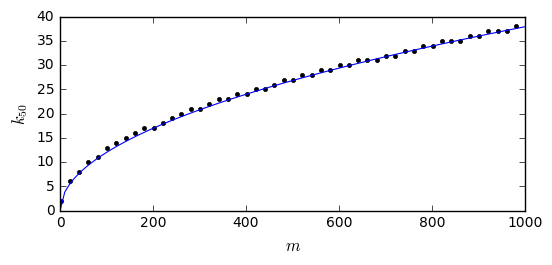

In [14]:
plt.close('all')
plt.figure(figsize=(6, 2.5))
plt.plot(m, k50werte, 'k.')
z = np.linspace(0, 1000, 100)
plt.plot(z, 1.2*np.sqrt(z), color='b', lw=0.8)
plt.xlabel('$m$', fontsize=12)
plt.ylabel('$k_{50}$', fontsize=12)

plt.show()

Der Vergleich der unten berechneten Näherungswerte mit den exakten Tabellenwer-<br>
ten zeigt eine gute Approximation durch die Funktion  (Aufgabe 5b)

In [15]:
[(m, (1.2*np.sqrt(m))) for m in (400, 900, 1600, 2500, 10000, 250000, 1000000, 13983816)]

[(400, 24.0), (900, 36.0), (1600, 48.0), (2500, 60.0), (10000, 120.0), (250000
, 600.0), (1000000, 1200.0), (13983816, 4487.39290011)]

Bei $k = 2 \cdot \sqrt{m}$ erreicht die Wahrscheinlichkeit für mindestens zwei gleiche Ergebnis-<br>
se fast 90%  (Aufgabe 5c)

Damit die Funktion $f$ auch für irrationale $k$ benutzt werden kann, wird<br>
sie leicht modifiziert

In [16]:
from sympy import ceiling

def ff(m, k):
    q = 1
    for i in range(ceiling(m-k+1), m):
        q *= i/m
    return 1 - q

In [17]:
[ff(m, 2*np.sqrt(m)) for m in (400, 900, 1600, 2500, 10000, 250000, 1000000, 13983816)]

[0.8670200951442043, 0.8662119073603859, 0.8658167163216178, 0.865582351062679
9, 0.8651196385197779, 0.8647550910142474, 0.8647098661620823, 0.8646052358027
866]